<a href="https://colab.research.google.com/github/m10923039/m10923039_hw01/blob/main/ObesityDataSet_raw_and_data_sinthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

讀取檔案

In [2]:
df_data=pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# **資料前處理**

## lable encoding

## family_history_with_overweight 超重的家族病史(是/否) <br>
no  -> 0 <br>
yes  -> 1
## SMOKE 抽煙(是/否) <br>
no  -> 0 <br>
yes  -> 1 <br>
## SCC 卡路里消耗監視(是/否)
no  -> 0 <br>
yes  -> 1 <br>
## CAEC 兩餐之間的食物消耗量
No  ->  1 <br>
no  ->  1 <br>
Sometimes  ->  2 <br>
Frequently  ->  3 <br>
Always  ->  4 <br>
## CALC 酒精消耗量
No  ->  1 <br>
no  ->  1 <br>
Sometimes  ->  2 <br>
Frequently  ->  3 <br>
Always  ->  4 <br>
# one hot 欄位
Gender 性別<br>
MTRANS 交通工具<br>

In [3]:
# df_data
df_data.loc()[df_data['family_history_with_overweight']=='no','family_history_with_overweight']=0
df_data.loc()[df_data['family_history_with_overweight']=='yes','family_history_with_overweight']=1

df_data.loc()[df_data['FAVC']=='no','FAVC']=0
df_data.loc()[df_data['FAVC']=='yes','FAVC']=1

df_data.loc()[df_data['SMOKE']=='no','SMOKE']=0
df_data.loc()[df_data['SMOKE']=='yes','SMOKE']=1

df_data.loc()[df_data['SCC']=='no','SCC']=0
df_data.loc()[df_data['SCC']=='yes','SCC']=1

df_data.loc()[df_data['CAEC']=='No','CAEC']=1
df_data.loc()[df_data['CAEC']=='no','CAEC']=1
df_data.loc()[df_data['CAEC']=='Sometimes','CAEC']=2
df_data.loc()[df_data['CAEC']=='Frequently','CAEC']=3
df_data.loc()[df_data['CAEC']=='Always','CAEC']=4

df_data.loc()[df_data['CALC']=='no','CALC']=1
df_data.loc()[df_data['CALC']=='Sometimes','CALC']=2
df_data.loc()[df_data['CALC']=='Frequently','CALC']=3
df_data.loc()[df_data['CALC']=='Always','CALC']=4

df_data[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']] =df_data[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']].astype(int)

df_data.loc()[df_data['NObeyesdad']=='Insufficient_Weight','NObeyesdad']=1
df_data.loc()[df_data['NObeyesdad']=='Normal_Weight','NObeyesdad']=2
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_I','NObeyesdad']=3
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_II','NObeyesdad']=4
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_III','NObeyesdad']=5
df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_I','NObeyesdad']=6
df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_II','NObeyesdad']=7


In [4]:
df_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,Public_Transportation,2
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,Public_Transportation,2
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,Public_Transportation,2
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,Walking,6
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,Public_Transportation,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,Public_Transportation,5
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,Public_Transportation,5
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,Public_Transportation,5
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,Public_Transportation,5


In [5]:
df_x=df_data.drop(['NObeyesdad'],axis=1)
df_y=df_data.loc[:,'NObeyesdad']

df_x = pd.get_dummies(df_x)
df_y = pd.get_dummies(df_y)

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2)



In [6]:
x_train.dtypes

Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
Gender_Female                       uint8
Gender_Male                         uint8
MTRANS_Automobile                   uint8
MTRANS_Bike                         uint8
MTRANS_Motorbike                    uint8
MTRANS_Public_Transportation        uint8
MTRANS_Walking                      uint8
dtype: object

In [7]:
x_train

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1135,21.959940,1.483284,62.894283,1,0,2.000000,1.680838,2,0,1.833635,0,0.281876,0.575848,1,1,0,0,0,0,1,0
992,20.707680,1.569878,69.743323,1,0,2.417635,3.000000,2,0,1.937674,0,1.417035,1.000000,1,1,0,0,0,0,1,0
681,22.637018,1.703584,51.607091,1,1,2.559960,3.000000,3,0,1.990788,0,0.486006,1.561272,1,1,0,0,0,0,1,0
1548,30.628650,1.766975,118.363376,1,1,2.964319,3.000000,2,0,2.377257,0,0.614959,1.875023,2,0,1,1,0,0,0,0
1291,22.720449,1.650000,89.139209,1,1,2.103335,2.964024,2,0,3.000000,0,0.632947,1.000000,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,20.101026,1.619128,104.303711,1,1,2.870895,1.627555,2,0,1.375728,0,0.210181,1.163117,1,0,1,0,0,0,1,0
2084,25.127910,1.668537,112.555456,1,1,3.000000,3.000000,2,0,2.868679,0,0.115369,0.028583,2,1,0,0,0,0,1,0
438,19.000000,1.670000,64.000000,0,1,3.000000,3.000000,2,0,2.000000,0,2.000000,1.000000,2,1,0,1,0,0,0,0
1042,36.310292,1.701397,83.000000,1,1,2.000000,1.000000,2,0,2.000000,0,1.472172,0.000000,1,1,0,1,0,0,0,0


In [8]:
y_train

,1,2,3,4,5,6,7
1135,0,0,0,0,0,0,1
992,0,0,0,0,0,0,1
681,1,0,0,0,0,0,0
1548,0,0,0,1,0,0,0
1291,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1665,0,0,0,1,0,0,0
2084,0,0,0,0,1,0,0
438,0,1,0,0,0,0,0
1042,0,0,0,0,0,0,1


In [9]:
x_test

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
579,17.000000,1.848294,59.409018,1,1,2.440040,3.000000,2,0,2.000000,0,2.784471,1.000000,1,0,1,1,0,0,0,0
1317,24.184891,1.768834,97.449743,1,1,2.000000,3.000000,2,0,2.973729,0,2.491642,1.365950,1,0,1,0,0,0,1,0
652,21.287999,1.555778,42.360100,0,0,2.318355,1.082304,3,0,1.220365,0,0.033328,0.000000,1,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,1,1,3.000000,3.000000,2,0,2.005130,0,1.341390,0.599270,2,1,0,0,0,0,1,0
2068,24.196367,1.697421,114.482386,1,1,3.000000,3.000000,2,0,2.909675,0,0.360908,0.573887,2,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,27.635029,1.806227,120.423567,1,1,2.974006,3.000000,2,0,2.565828,0,0.690269,1.339691,2,0,1,0,0,0,1,0
528,21.996523,1.733263,50.890363,0,0,3.000000,3.765526,3,0,1.656082,0,0.427770,0.555967,2,1,0,0,0,0,1,0
335,19.000000,1.700000,50.000000,0,1,1.000000,4.000000,3,0,1.000000,0,2.000000,1.000000,2,0,1,0,0,0,1,0
1651,25.027254,1.757154,112.200812,1,1,1.264234,3.000000,2,0,2.000000,0,1.333435,0.002168,2,0,1,0,0,0,1,0


In [10]:
y_test

,1,2,3,4,5,6,7
579,1,0,0,0,0,0,0
1317,0,0,1,0,0,0,0
652,1,0,0,0,0,0,0
2107,0,0,0,0,1,0,0
2068,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1753,0,0,0,1,0,0,0
528,1,0,0,0,0,0,0
335,1,0,0,0,0,0,0
1651,0,0,0,1,0,0,0


In [11]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='elu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='elu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(32,activation='elu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(16,activation='elu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dense(32,activation='elu', name ="nl5" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                704       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 32)                544       
_________________________________________________________________
nl4 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl5 (Dense)                  (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0     

In [12]:
# model.reset_metrics()
# model.reset_states()
precision=tf.keras.metrics.Precision(name='precision')
recall=tf.keras.metrics.Recall(name='recall')
accuracy=tf.keras.metrics.Accuracy(name='accuracy')
callback = tf.keras.callbacks.EarlyStopping(monitor='recall',mode='max', patience=5 ,restore_best_weights=True)

Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [precision,recall,accuracy]
              )

history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 2s 2ms/step - loss: 2.1142 - precision: 0.3560 - recall: 0.0909 - accuracy: 0.0000e+00
Epoch 2/50
338/338 [==============================] - 1s 2ms/step - loss: 1.1453 - precision: 0.6078 - recall: 0.3203 - accuracy: 0.0000e+00
Epoch 3/50
338/338 [==============================] - 1s 2ms/step - loss: 0.9012 - precision: 0.7029 - recall: 0.4859 - accuracy: 0.0000e+00
Epoch 4/50
338/338 [==============================] - 1s 2ms/step - loss: 0.7794 - precision: 0.7307 - recall: 0.5600 - accuracy: 0.0000e+00
Epoch 5/50
338/338 [==============================] - 1s 2ms/step - loss: 0.7013 - precision: 0.7475 - recall: 0.6095 - accuracy: 0.0000e+00
Epoch 6/50
338/338 [==============================] - 1s 2ms/step - loss: 0.6960 - precision: 0.7279 - recall: 0.6120 - accuracy: 0.0000e+00
Epoch 7/50
338/338 [==============================] - 1s 2ms/step - loss: 0.6896 - precision: 0.7325 - recall: 0.6208 - accuracy: 4.6950e-05
Epoch 8/50
33

**指標F1**

In [13]:
preds = model.evaluate(x = x_test, y =y_test )

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall', preds[2])
print('F1',F1)


14/14 [==============================] - 0s 2ms/step - loss: 0.4577 - precision: 0.8316 - recall: 0.7707 - accuracy: 0.0000e+00
Precision 0.831632673740387
Recall 0.7706855535507202
F1 0.799999995751197


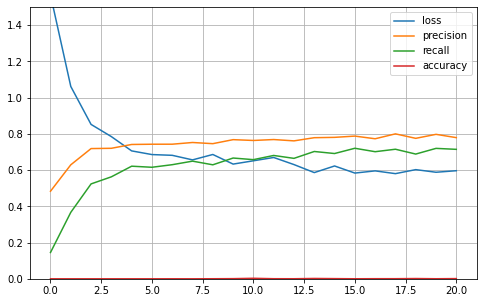

In [14]:

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()



# **Value**

In [29]:
dfr_x=df_data.drop(['NObeyesdad'],axis=1)
dfr_x=df_data.loc[:,'NObeyesdad']

In [30]:
dfr_x=df_data.drop(['Height'],axis=1)
dfr_y=df_data.loc[:,'Height']
dfr_x = pd.get_dummies(dfr_x)
x_train_Value,x_test_Value,y_train_Value,y_test_Value = train_test_split(dfr_x,dfr_y,test_size=0.2)

In [ ]:
dfr_x

In [ ]:
x_train_Value.shape[1]

In [35]:
input_layer_Value = Input(shape=(x_train_Value.shape[1],))
dense_layer_Value_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer_Value)
dense_layer_Value_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_Value_1)
dense_layer_Value_2 = Dense(32,activation='relu', name ="nl3" )(dense_layer_Value_2)
dense_layer_Value_2 = Dense(16,activation='relu', name ="nl4" )(dense_layer_Value_2)
dense_layer_Value_2 = Dropout(0.5)(dense_layer_Value_2)
output_Value = Dense(1)(dense_layer_Value_2)
model_Value = Model(inputs=input_layer_Value, outputs=output_Value)
print(model_Value.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                896       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 32)                544       
_________________________________________________________________
nl4 (Dense)                  (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17  

In [36]:
callback_Value = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam_Value = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model_Value.compile(optimizer=Adam, 
              loss=[tf.keras.losses.mae],
              metrics=[tf.metrics.mse]#tf.keras.metrics.mae,tf.keras.metrics.mape,          
              )
history_Value = model_Value.fit(x=x_train_Value, y=y_train_Value,  epochs=50,batch_size =5, callbacks=[callback_Value] )

Epoch 1/50
338/338 [==============================] - 1s 2ms/step - loss: 1.1431 - mean_squared_error: 5.0289
Epoch 2/50
338/338 [==============================] - 1s 2ms/step - loss: 0.1522 - mean_squared_error: 0.0384
Epoch 3/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0793 - mean_squared_error: 0.0094
Epoch 4/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0772 - mean_squared_error: 0.0086
Epoch 5/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0751 - mean_squared_error: 0.0083
Epoch 6/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0720 - mean_squared_error: 0.0078
Epoch 7/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0749 - mean_squared_error: 0.0082
Epoch 8/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0744 - mean_squared_error: 0.0081
Epoch 9/50
338/338 [==============================] - 1s 2ms/step - loss: 0.0754 - mean_squared_error: 0.0085
Epoch 10/5

In [37]:
df_test_y_predicted = model_Value.predict(x_test_Value)


In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mean_absolute_percentage_error(y_test_Value,df_test_y_predicted)
print('RMSE为：',np.sqrt(mean_squared_error(y_test_Value,df_test_y_predicted)))
print('MAE为：',mean_absolute_error(y_test_Value,df_test_y_predicted))
print('MAPE为：',mean_absolute_percentage_error(y_test_Value,df_test_y_predicted))

RMSE为： 0.09295758496130543
MAE为： 0.07687058257082674
MAPE为： 0.045020444689091575


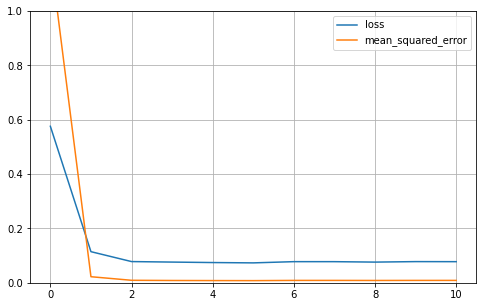

In [40]:
# history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history_Value.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()